In [1]:

import pandas as pd
import numpy as np
import random
from scipy.stats import loguniform, lognorm
from scipy import stats
import time
import math
from matplotlib import pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Load and format the data

In [4]:
import pandas as pd
import numpy as np

def npy2df(input_file, return_gene_info=False):
    """
    Load the npy file with X number of bursting parameter estimation for a given gene. 
    if return_gene_info is True : 
        return the df containing the estimation, the gene index number (starting from 1, not 0) and a gene array of some sort?
    else: return the dataframe with the parameter estimation as column and each estimation attemps as rows
        
    """
    gene_no, gene, result = np.load(input_file, allow_pickle='True')
    
    result_flatten = result.flatten()
    df = pd.DataFrame([x for x in result_flatten])
    
    if return_gene_info:
        return(df, gene_no, gene)
    else:
        return(df)

In [5]:
%ls data\posterior\Newfolder

 Volume in drive C is Windows
 Volume Serial Number is 24D1-4189

 Directory of C:\SHRR\TUM\Thesis\transcriptional_bursting\BayesGTM\data\posterior\Newfolder

11/04/2022  07:42    <DIR>          .
11/04/2022  07:42    <DIR>          ..
10/24/2022  12:17           659,215 gene_10.npy
10/24/2022  13:16           637,503 gene_11.npy
10/24/2022  14:23           645,978 gene_12.npy
10/24/2022  15:21           721,084 gene_13.npy
10/24/2022  16:41           699,280 gene_14.npy
10/24/2022  17:49           704,778 gene_15.npy
10/24/2022  18:45           705,270 gene_16.npy
10/24/2022  19:42           656,482 gene_17.npy
10/24/2022  20:39           698,709 gene_18.npy
10/24/2022  22:01           625,676 gene_19.npy
10/24/2022  01:40           665,780 gene_2.npy
10/24/2022  03:41           612,772 gene_3.npy
10/24/2022  04:54           687,570 gene_4.npy
10/24/2022  06:07           590,122 gene_5.npy
10/24/2022  07:19           658,230 gene_6.npy
10/24/2022  08:33           689,456 gene_7.npy
10

In [6]:
df = npy2df('data/posterior/gene_3.npy')
df

,kon,ron,koff,roff,mu,delta,dist
0,3.821643,1.205852,1.110414,0.167028,9.404535,1.0,0.069970
1,5.393515,0.901127,5.079568,0.384403,8.662704,1.0,0.191727
2,8.393598,1.705085,2.862403,0.334966,10.736498,1.0,0.329871
3,3.033872,0.851773,5.944844,0.900059,10.833863,1.0,0.161974
4,8.368427,2.161083,2.681907,0.315275,9.887281,1.0,0.085178
...,...,...,...,...,...,...,...
995,1.422435,0.603965,3.854167,1.876964,12.626788,1.0,0.576188
996,6.212434,2.939926,0.941476,0.343949,9.447301,1.0,0.429837
997,3.447604,1.749154,1.106471,0.382944,12.450786,1.0,0.222407
998,2.031851,0.661939,5.268004,0.773190,10.218555,1.0,0.151878


In [7]:
def BFandBS(df):
    """
    input is the dataframe containing the parameters as columns.
    need column named 'koff', 'roff', 'kon', 'ron' 
    
    compute burst frequency and burst size from the parameters
    """
    df['tau_off']= df['kon']/df['ron']
    df['tau_on'] = df['koff']/df['roff']
    df['bf'] = 1./(df['tau_on'] + df['tau_off'])
    df['bs'] = df['mu'] * df['tau_on']

In [8]:
BFandBS(df)
df

,kon,ron,koff,roff,mu,delta,dist,tau_off,tau_on,bf,bs
0,3.821643,1.205852,1.110414,0.167028,9.404535,1.0,0.069970,3.169246,6.648072,0.101861,62.522027
1,5.393515,0.901127,5.079568,0.384403,8.662704,1.0,0.191727,5.985297,13.214161,0.052085,114.470368
2,8.393598,1.705085,2.862403,0.334966,10.736498,1.0,0.329871,4.922685,8.545365,0.074250,91.747292
3,3.033872,0.851773,5.944844,0.900059,10.833863,1.0,0.161974,3.561831,6.604951,0.098360,71.557136
4,8.368427,2.161083,2.681907,0.315275,9.887281,1.0,0.085178,3.872329,8.506569,0.080783,84.106839
...,...,...,...,...,...,...,...,...,...,...,...
995,1.422435,0.603965,3.854167,1.876964,12.626788,1.0,0.576188,2.355162,2.053404,0.226831,25.927900
996,6.212434,2.939926,0.941476,0.343949,9.447301,1.0,0.429837,2.113126,2.737256,0.206169,25.859679
997,3.447604,1.749154,1.106471,0.382944,12.450786,1.0,0.222407,1.971012,2.889379,0.205745,35.975043
998,2.031851,0.661939,5.268004,0.773190,10.218555,1.0,0.151878,3.069544,6.813339,0.101185,69.622479


In [9]:
df['log_kon'] = [np.log10(x) for x in df['kon']]
df['log_koff'] = [np.log10(x) for x in df['koff']]

In [10]:
df['log_bs'] = [np.log10(x) for x in df['bs']]
df['log_bf'] = [np.log10(x) for x in df['bf']]

# Smooth kernel density 

Kernel density estimate KDE


In [11]:
from scipy.stats import gaussian_kde
def best_parameters(df, density_kernel_name=None, save_kde=False):
    """
    return the index for the best parameters.
    
    if density_kernel_name is None , we recompute the gaussian kde and if save_kde is a str. 
    Save the kde in df using save_kde as column name
    """
    
    if density_kernel_name is None:
        # Calculate the point density
        xy = np.vstack([df['bs'],df['bf']])
        z = gaussian_kde(xy)(xy)
        if save_kde is not False:
            df[save_kde] = z
            
    else:
        z = df[density_kernel_name]
    
    return(np.where(z == np.amax(z))[0][0])

        

In [12]:
best_parameters(df, save_kde='density_kernel')

781

In [13]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.color_palette("viridis")

def plot_kde(df, bs, bf, kde="density_kernel",
             title=None, dot_size=4, colormap='viridis',
             best_param=True,
             linestype='-', color_line='grey',
             norm_scale=True,
             show=True,
             save=None):
    """
    

    --> put the line with best parameter as an option..
    
    --> later we need to create a wrapper function to give a adata objet + a gene name
    
    df
    bs
    df
    kde="density_kernel"
    title
    size
    colormap
    best_param
    linestype
    color_line
    norm_scale
    show
    save
    """
    
    # scatter plot
    if norm_scale:
        fig = sns.scatterplot(data=df, x=bf, y=bs,
                              hue=kde, size_norm=(0,1),
                              palette=colormap, s=dot_size)
    else:
        fig = sns.scatterplot(data=df, x=bf, y=bs,
                              hue=kde, hue_norm=(np.min(df['density_kernel']),
                                                 np.max(df['density_kernel'])),
                              palette=colormap, s=dot_size)
    
    if title is not None: 
        fig.set_title(title)
    
    #plt.legend(loc=legend_loc)
    plt.legend(bbox_to_anchor=(1.05, 1),
               loc='upper left',
               borderaxespad=0,
              title='kernel density')
    
    if best_param : 
    
        # Add the best parameter estimation based on the density kernel
        index_max_parameter = best_parameters(df, save_kde="density_kernel")
        xmax = df[bs][index_max_parameter]
        ymax = df[bf][index_max_parameter]
        fig.axvline(ymax, color="grey", linestyle="-.", linewidth=0.5) #linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
        fig.axhline(xmax, color="grey", linestyle="-.", linewidth=0.5)
    
    
    # plot / saving settings
    if save is not None:
        plt.savefig(save, bbox_inches='tight')
    if show :
        plt.show()

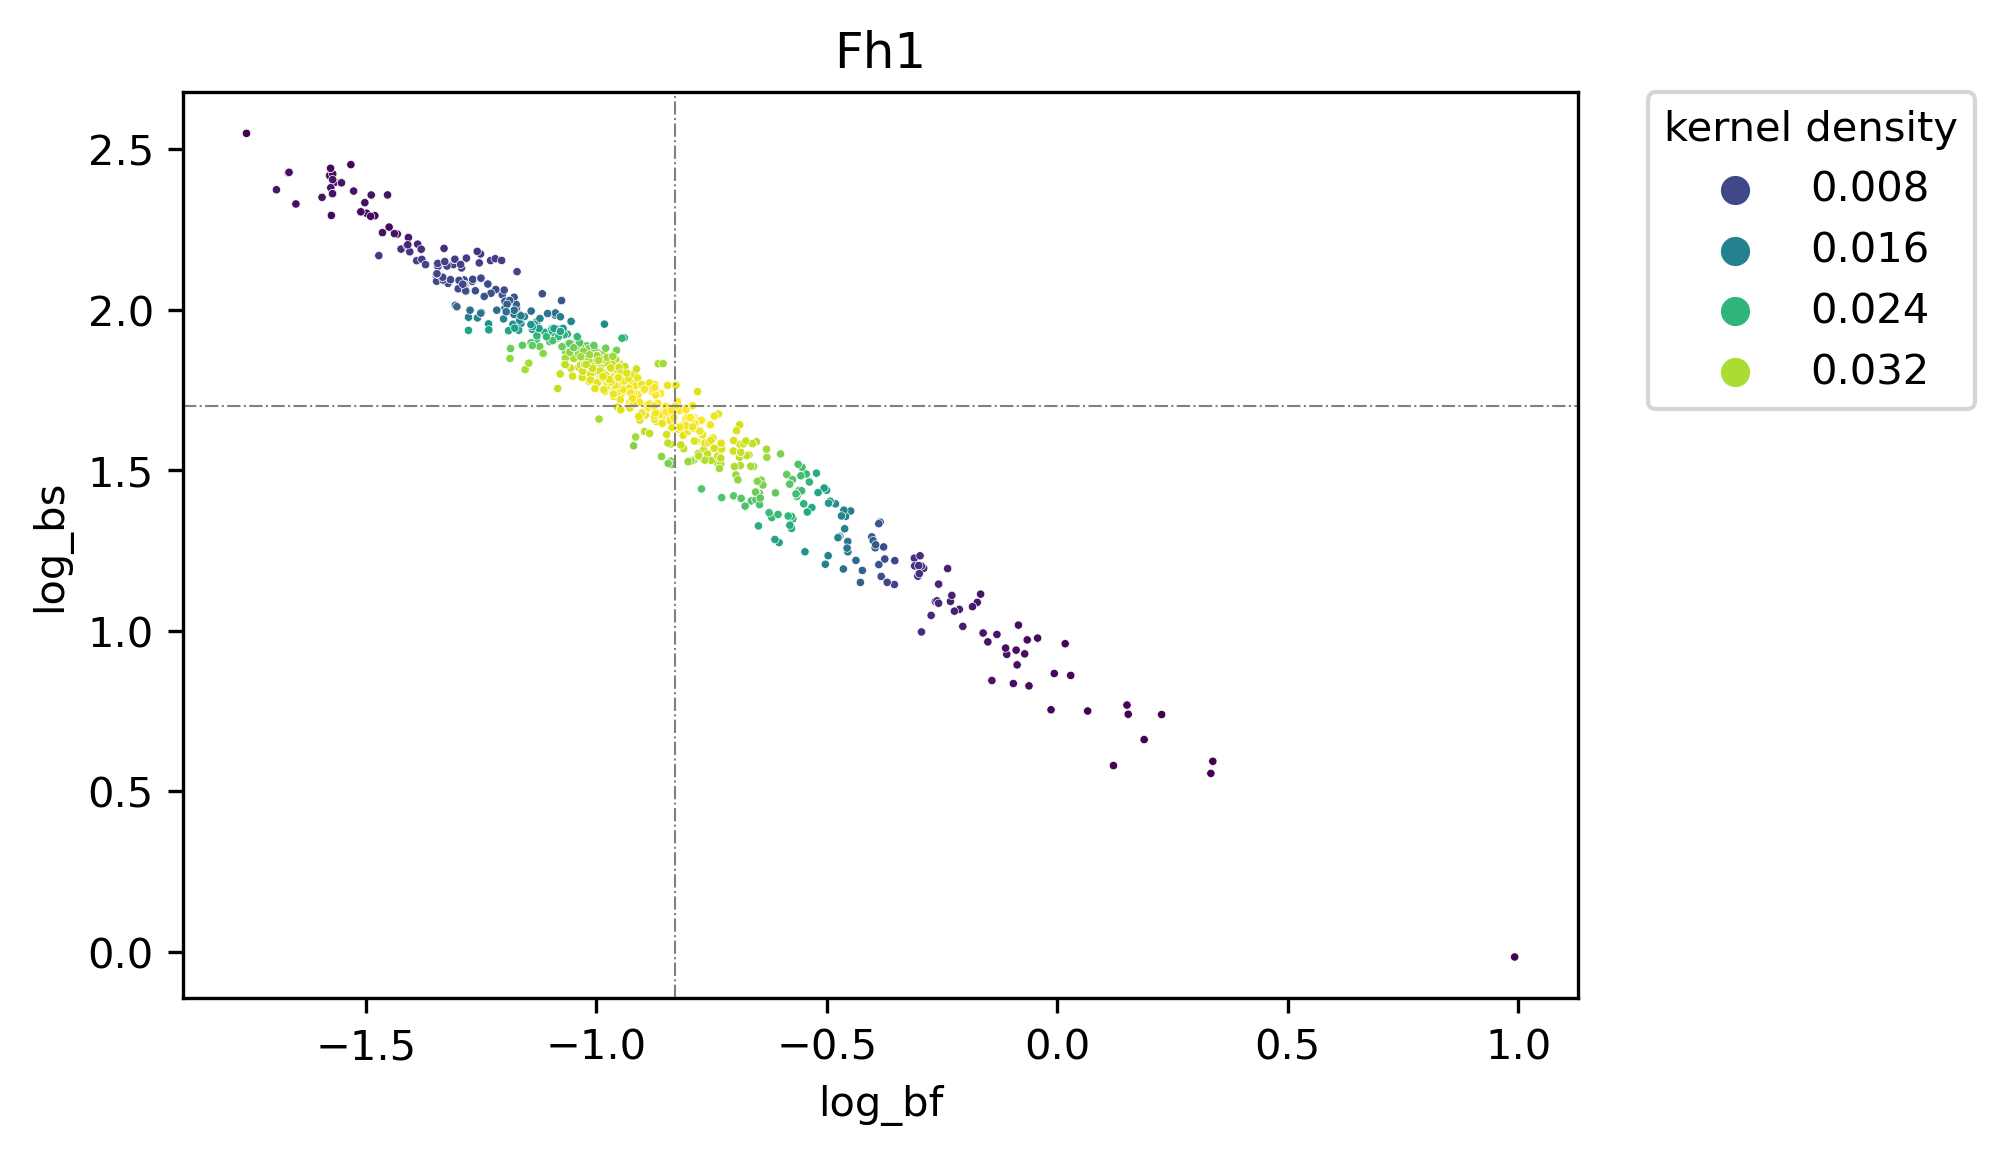

In [14]:
plot_kde(df, bs="log_bs", bf="log_bf", title="Fh1", dot_size=4, save="Fh1_kde_scatterplot.png")

In [15]:
# normalise the kernel density scale between 0 and 1 
sns.scatterplot?

In [16]:
# df.iloc[2851]

kon                3.337874
ron                1.509647
koff               3.073751
roff               0.700595
mu                 8.975618
delta              1.000000
dist               0.298402
tau_off            2.211030
tau_on             4.387347
bf                 0.151552
bs                39.379149
log_kon            0.523470
log_koff           0.487669
log_bs             1.595266
log_bf            -0.819437
density_kernel     0.041241
Name: 2851, dtype: float64